# 🔥 Problem: Customer Segmentation for Retail Business  

## 🎯 Business Impact
- 📉 Marketing Cost ↓  
- 📈 Revenue ↑  
- 🎯 Better Personalization  
- 🔄 Churn Reduction  

---

## 📌 Real-World Use Cases  

Companies like:
- 🛒 Amazon  
- 🛍️ Flipkart  
- 🍔 Zomato  
- 🏦 Banks  

### Why Customer Segmentation?
- 💎 High-value customers identify karna  
- 🎁 Discounts sirf right customers ko dena  
- 🔁 Customer churn kam karna  
- 📊 Targeted marketing campaigns run karna  

---

## 📊 Dataset (Industry-Type – Kaggle)

**Dataset Name:** Mall Customers Dataset  
🔗 Kaggle: *Customer Segmentation DATA*  

### 🧾 Features:

| Feature Name | Description |
|--------------|-------------|
| CustomerID | Unique ID for each customer |
| Gender | Male / Female |
| Age | Customer age |
| Annual Income (k$) | Customer annual income (in thousand dollars) |
| Spending Score (1–100) | Customer spending behavior score assigned by mall |

---

## 🚀 Goal

Use clustering algorithms (like K-Means) to:
- Segment customers into different groups  
- Identify premium / high-spending customers  
- Improve marketing strategy  

---


## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\projects\Customer-Segmentation\data\Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.88,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.97,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.26,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.82,1.0,34.75,50.0,73.00,99.0


- looking like short of normal all the features


In [9]:
df.drop(columns='CustomerID',inplace=True)

- CustomerID is not help to understand the actual segmentation cuz their are not actually meaning of this feature.


In [10]:
num_col=df.select_dtypes(include='number').columns
num_col

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

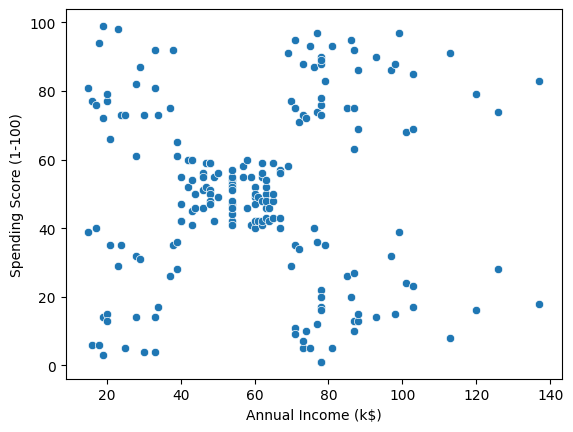

In [11]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

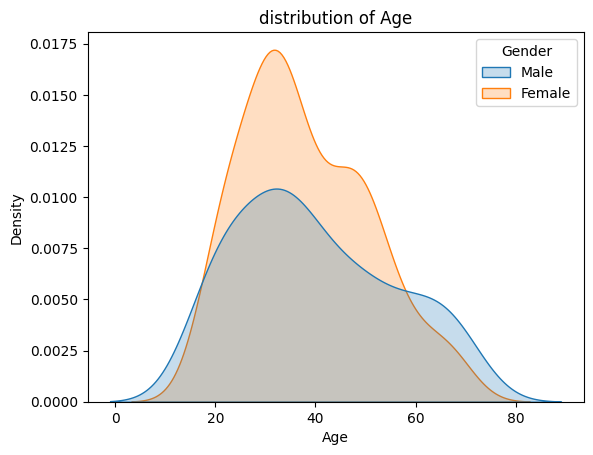

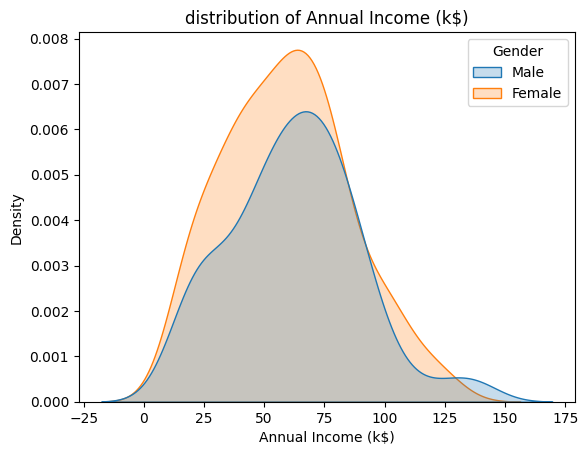

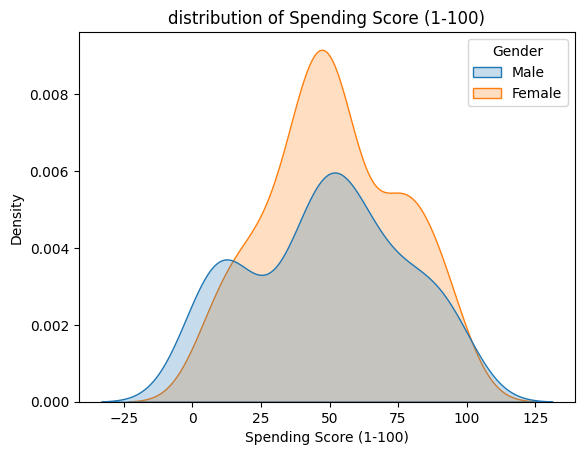

In [12]:
for col in num_col:
    sns.kdeplot(x=col,color='blue',fill=True,data=df,hue=df['Gender'])
    plt.xlabel(col)
    plt.title(f'distribution of {col}')
    plt.show()

    

- female do more spend than the man.
- mal.
- most of the female is aged than male 

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

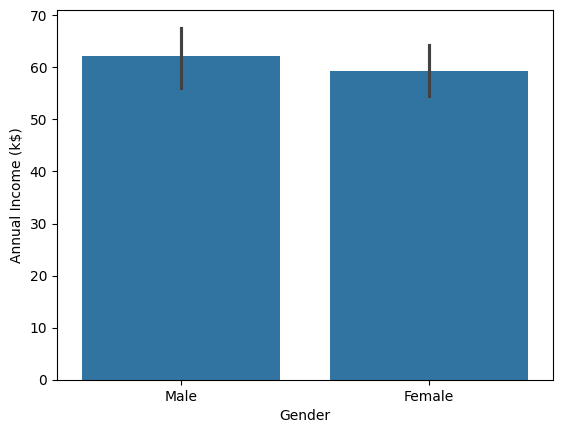

In [13]:
sns.barplot(x='Gender',y='Annual Income (k$)',data=df)

- male income is slightly higher than the women-income

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

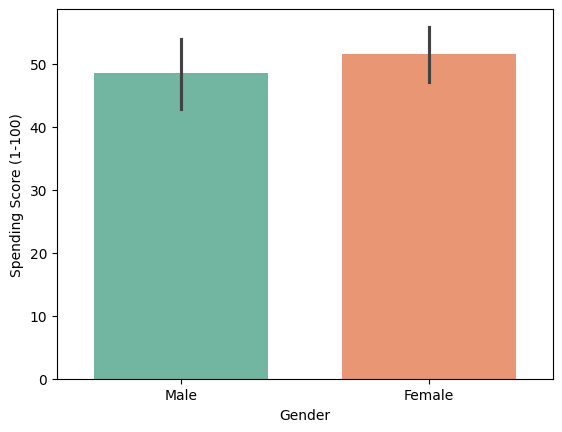

In [14]:
sns.barplot(x=df['Gender'],y=df['Spending Score (1-100)'],hue=df['Gender'],estimator='mean',palette='Set2',legend=False,width=0.7)

- female sepnding score is  compreatively slighter higher than man.

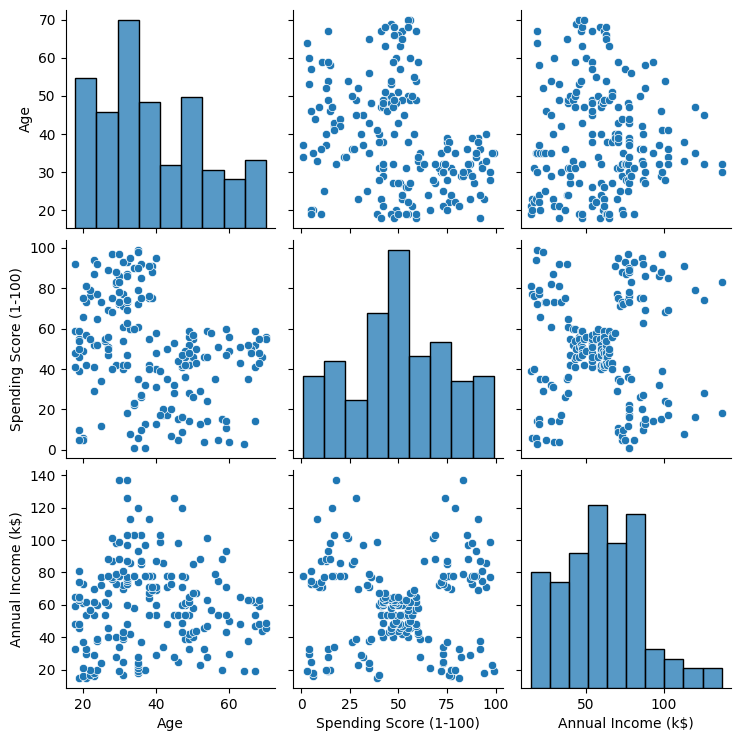

In [15]:
sns.pairplot(data=df[['Age','Spending Score (1-100)','Annual Income (k$)']],palette='Set2')

<Axes: >

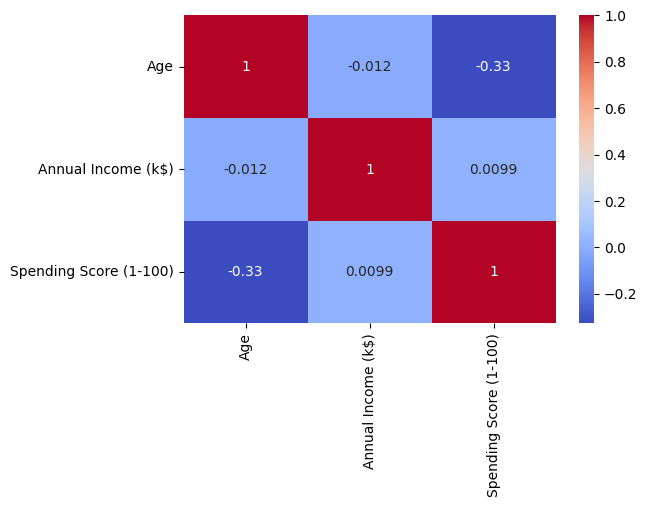

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

- spending score and age has negative moderate correlation means less aged people do spend more (means if spending score will be increse than age will be decrease.)

In [17]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

*Why Age skip?*
- Marketing decision making happens at the  income + spending not age but age could be an indicator.
- feature relevance > feature count

In [18]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [19]:
x_scaled.shape

(200, 2)

In [20]:
silhouette_scr=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k)
    labels=kmean.fit_predict(x_scaled)
    score=silhouette_score(x_scaled,labels)
    silhouette_scr.append(score)
    print(f'for {k}_cluster score is :{score:.3f}')



for 2_cluster score is :0.293
for 3_cluster score is :0.467
for 4_cluster score is :0.494
for 5_cluster score is :0.555
for 6_cluster score is :0.538
for 7_cluster score is :0.510
for 8_cluster score is :0.504
for 9_cluster score is :0.446
for 10_cluster score is :0.426


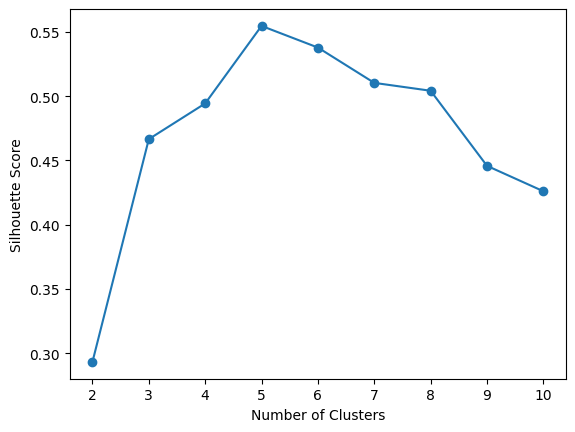

In [21]:
plt.plot(range(2,11), silhouette_scr, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


- best value of k is 5 where the silhoette score is more than others.

## Silhouette Score – Intuition

Silhouette Score measures how well each data point fits into its assigned cluster.

For each data point:

- **a (Intra-cluster distance)**  
  The average distance between the point and other points in the same cluster.  
  → Smaller **a** means the point is tightly grouped within its cluster.

- **b (Inter-cluster distance)**  
  The average distance between the point and points in the nearest neighboring cluster.  
  → Larger **b** means the point is well separated from other clusters.

### Formula

\[
Silhouette\ Score = \frac{b - a}{\max(a, b)}
\]

### Interpretation

- **Close to 1** → Well-clustered and clearly separated  
- **Around 0** → Clusters overlap  
- **Negative** → Possibly assigned to the wrong cluster  

Silhouette Score evaluates both **cluster compactness (a)** and **cluster separation (b)**.


In [22]:
km=KMeans(n_clusters=5,random_state=42)
df['Cluster']=km.fit_predict(x_scaled)

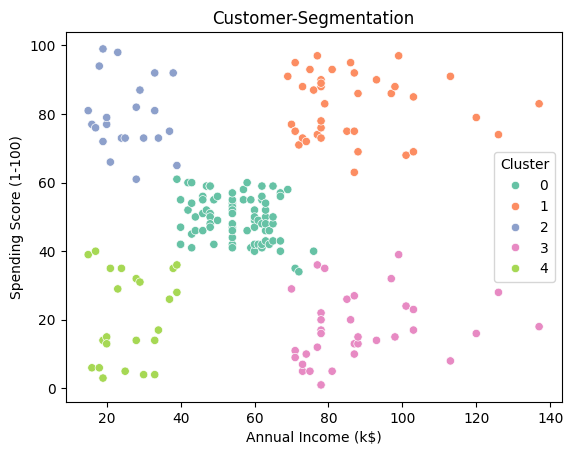

In [23]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Cluster',palette='Set2')
plt.title('Customer-Segmentation')
plt.show()

In [24]:
df.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# 📊 Customer Segmentation Analysis

## 🔎 Objective

In this analysis, we segmented customers based on their **Annual Income** and **Spending Score** using KMeans clustering.

The goal is simple:  
Understand different types of customers so that marketing decisions can be more targeted instead of treating everyone the same.

---

## 📌 Cluster Overview

| Cluster | Avg Income (k$) | Avg Spending Score | Customer Type |
|----------|----------------|-------------------|---------------|
| 0 | 55.29 | 49.51 | Mid Income – Moderate Spending |
| 1 | 86.53 | 82.12 | High Income – High Spending |
| 2 | 25.72 | 79.36 | Low Income – High Spending |
| 3 | 88.20 | 17.11 | High Income – Low Spending |
| 4 | 26.30 | 20.91 | Low Income – Low Spending |

---

## 🎯 What These Segments Actually Mean

### 🟢 Cluster 1 – High Income, High Spending
These are clearly the premium customers.  
They earn well and spend well.

They are likely contributing a major share of revenue.

**What to do:**
- Offer loyalty programs
- Give early access to new launches
- Focus on retention rather than acquisition

Losing this segment would directly impact revenue.

---

### 🔵 Cluster 3 – High Income, Low Spending
This is an interesting group.  
They have the capacity to spend but currently aren't spending much.

This segment represents opportunity.

**What to do:**
- Personalized recommendations
- Upselling premium products
- Exclusive targeted campaigns

Even a small increase in spending from this group can create noticeable growth.

---

### 🟡 Cluster 2 – Low Income, High Spending
These customers spend actively despite lower income.

They are likely attracted by discounts or trendy products.

**What to do:**
- Flash sales
- Discount campaigns
- Bundle offers

This segment responds well to promotional marketing.

---

### 🟣 Cluster 4 – Low Income, Low Spending
This segment contributes the least revenue.

Spending is limited and engagement is low.

**What to do:**
- Minimal marketing spend
- Automated campaigns only
- Avoid high acquisition cost for this group

Focus resources elsewhere.

---

### 🟤 Cluster 0 – Mid Income, Moderate Spending
This is the stable segment.

Not extreme in any direction but has growth potential.

**What to do:**
- Cross-selling strategies
- Personalized product suggestions
- Gradual loyalty building

This segment can be nurtured over time.

---

## 🚀 Overall Business Understanding

Instead of treating all customers equally, segmentation helps us:

- Identify where revenue is actually coming from
- Find hidden growth opportunities
- Avoid wasting marketing budget
- Create personalized strategies

The biggest value lies in:
1. Retaining Cluster 1
2. Converting Cluster 3
3. Monetizing Cluster 2 strategically

---

## 🧠 Final Thoughts

Customer segmentation is not just a technical exercise.  
It directly supports better business decisions.

By understanding customer behavior patterns, we can move from generic marketing to targeted, data-driven strategies that improve ROI and long-term growth.
